In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [12]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lats_lngs = zip(lats,lngs)

lats_lngs

In [13]:
#Add the latiudes and longitudes to a list
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

coordinates = list(lats_lngs)

In [14]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
print(len(cities))

612


In [15]:
#We will need to do the following:

#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [16]:
#*****DO NOT PRINT URL**********************************
import requests
from config import weather_api_key
import time
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
#Create an empty list to hold the weather data

city_data = []

#Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
#Loop through all the cities in our list

#for i in range (len(cities)):
#    
#    #Group cities in sets of 50; weather api call <= 60 calls/min
#    if(i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)
#        
#    #Create endpoint URL with each city
#    city_url = url + '&q=' + cities[i]


#this for loop will not work for the following reasons:Every time we want to reference the city in our code, 
#we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url 
#because it adds the index, not the city name, to the city_url. 
#To fix this issue, we need to create another for loop to get the city from the cities list.



    

In [19]:
#Instead of using two for loops, we can use the enumerate() method

for i, city in enumerate(cities):
    
    #Group cities in sets of 50; weather api call <= 60 calls/min
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')
    
    #Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to the record count
    record_count += 1
    
    #Run an API request for each city using try/except block:
    
    try:
        #Parse the Json and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #append the city info into city_data list
        
        city_data.append({
        "City": city.title(),
        "Lat": city_lat,
        "Lng": city_lng,
        "Max Temp": city_max_temp,
        "Humidity": city_humidity,
        "Cloudiness": city_clouds,
        "Wind Speed": city_wind,
        "Country": city_country,
        "Date": city_date   
        })
        
    #if an error is experienced, skip the city
        
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | tessalit
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | black river
Processing Record 7 of Set 1 | saint-joseph
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | marrakesh
Processing Record 12 of Set 1 | northam
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | cihuatlan
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | mitsamiouli
Processing Record 19 of Set 1 | cascais
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | san juan
Processing Record 22 of Set 1 | touros
Processing Record 23 of Set 1 | kudahuvadhoo
Processing Record 24 of Set 1 | port hardy
Processing Recor

Processing Record 38 of Set 4 | teguldet
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | paramonga
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | danielskuil
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | saran
Processing Record 46 of Set 4 | gat
Processing Record 47 of Set 4 | matagami
Processing Record 48 of Set 4 | kizukuri
Processing Record 49 of Set 4 | oga
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | pacifica
Processing Record 2 of Set 5 | palmas
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | grootfontein
Processing Record 7 of Set 5 | vernon
Processing Record 8 of Set 5 | palaiokhora
City not found. Skipping...
Processing Record 9 of Set 5 | surt
Processing Record 10 of Set 5 | vostok
Processing Record 11 of Set 5 | kyshtym
Pr

Processing Record 29 of Set 8 | begunitsy
Processing Record 30 of Set 8 | raub
Processing Record 31 of Set 8 | maimon
City not found. Skipping...
Processing Record 32 of Set 8 | mondragone
Processing Record 33 of Set 8 | namatanai
Processing Record 34 of Set 8 | krasnoselkup
Processing Record 35 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 36 of Set 8 | lodja
Processing Record 37 of Set 8 | taoudenni
Processing Record 38 of Set 8 | riviere-au-renard
Processing Record 39 of Set 8 | chuy
Processing Record 40 of Set 8 | angouleme
Processing Record 41 of Set 8 | pamanukan
Processing Record 42 of Set 8 | sorvag
City not found. Skipping...
Processing Record 43 of Set 8 | kilindoni
Processing Record 44 of Set 8 | velikodvorskiy
Processing Record 45 of Set 8 | sambava
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | villazon
Processing Record 48 of Set 8 | oni
Processing Record 49 of Set 8 | anderson
Processing Record 50 of Set 8 | mildura
Processing R

Processing Record 15 of Set 12 | kondagaon
Processing Record 16 of Set 12 | alihe
Processing Record 17 of Set 12 | kyle of lochalsh
City not found. Skipping...
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | mpwapwa
Processing Record 20 of Set 12 | ahipara
Processing Record 21 of Set 12 | tecoanapa
Processing Record 22 of Set 12 | phan rang
City not found. Skipping...
Processing Record 23 of Set 12 | quatre cocos
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | tanda
Processing Record 26 of Set 12 | vezirkopru
Processing Record 27 of Set 12 | avrille
Processing Record 28 of Set 12 | cabo san lucas
Processing Record 29 of Set 12 | atbasar
Processing Record 30 of Set 12 | alekseyevka
Processing Record 31 of Set 12 | nueva loja
Processing Record 32 of Set 12 | yei
Processing Record 33 of Set 12 | igrim
Processing Record 34 of Set 12 | chernyshevskiy
Processing Record 35 of Set 12 | hof
Processing Record 36 of Set 12 

In [20]:
#Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,53.19,90,0,5.75,US,2022-02-19 02:24:07
1,Te Anau,-45.4167,167.7167,55.90,78,63,6.04,NZ,2022-02-19 02:24:07
2,Tessalit,20.1986,1.0114,71.56,15,100,9.71,ML,2022-02-19 02:24:07
3,Albany,42.6001,-73.9662,20.08,67,6,10.13,US,2022-02-19 02:23:56
4,Yar-Sale,66.8333,70.8333,19.44,95,100,15.57,RU,2022-02-19 02:24:08
5,Black River,18.0264,-77.8487,77.00,79,7,2.84,JM,2022-02-19 02:24:08
6,Saint-Joseph,-21.3667,55.6167,75.58,84,33,16.84,RE,2022-02-19 02:24:08
7,Vaini,-21.2000,-175.2000,81.82,70,3,10.42,TO,2022-02-19 02:20:24
8,Busselton,-33.6500,115.3333,91.04,30,0,4.56,AU,2022-02-19 02:24:09
9,Port Alfred,-33.5906,26.8910,68.90,84,22,18.45,ZA,2022-02-19 02:24:09


In [21]:
new_column_order = ['City', 'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2022-02-19 02:24:07,40.5982,-124.1573,53.19,90,0,5.75
1,Te Anau,NZ,2022-02-19 02:24:07,-45.4167,167.7167,55.90,78,63,6.04
2,Tessalit,ML,2022-02-19 02:24:07,20.1986,1.0114,71.56,15,100,9.71
3,Albany,US,2022-02-19 02:23:56,42.6001,-73.9662,20.08,67,6,10.13
4,Yar-Sale,RU,2022-02-19 02:24:08,66.8333,70.8333,19.44,95,100,15.57
5,Black River,JM,2022-02-19 02:24:08,18.0264,-77.8487,77.00,79,7,2.84
6,Saint-Joseph,RE,2022-02-19 02:24:08,-21.3667,55.6167,75.58,84,33,16.84
7,Vaini,TO,2022-02-19 02:20:24,-21.2000,-175.2000,81.82,70,3,10.42
8,Busselton,AU,2022-02-19 02:24:09,-33.6500,115.3333,91.04,30,0,4.56
9,Port Alfred,ZA,2022-02-19 02:24:09,-33.5906,26.8910,68.90,84,22,18.45


In [23]:
#create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

#export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [24]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

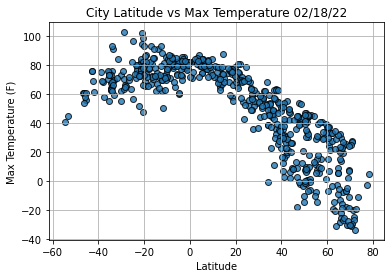

In [28]:
#Import time module

import time

#Build the scatter plot for latitude vs max. temperature

plt.scatter(
    lats, #x
    max_temps, #y
    edgecolor ='k', 
    linewidths = 1, 
    marker = 'o', 
    alpha = .8, 
    label = 'Cities'
)

#Incorporate the other graph properties

plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

#Save the figure

plt.savefig('weather_data/Fig1.png')

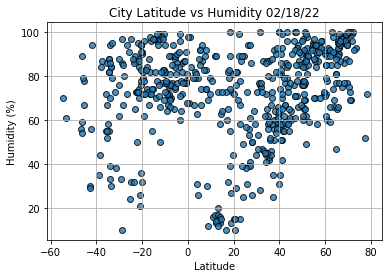

In [30]:
#Build the scatter plot for latitude vs max. humidity

plt.scatter(
    lats,
    humidity,
    edgecolor ='k', 
    linewidths = 1, 
    marker = 'o', 
    alpha = .8, 
    label = 'Cities' 
)

plt.title(f'City Latitude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig('weather_data/Fig2.png')

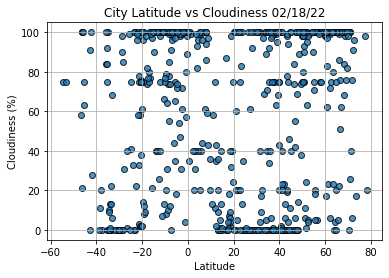

In [31]:
#Build the scatter plot for latitude vs max. cloudiness

plt.scatter(
    lats,
    cloudiness,
    edgecolor = 'k',
    linewidths = 1,
    marker = 'o',
    alpha = .8,
    label = 'Cities'
)

plt.title(f'City Latitude vs Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig('weather_data/Fig3.png')

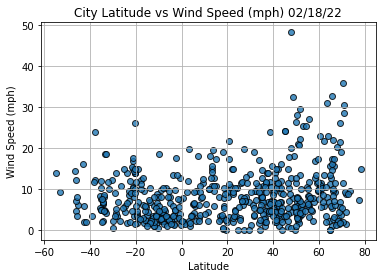

In [33]:
#Build the scatter plot for latitude vs max. wind speed

plt.scatter(
    lats,
    wind_speed,
    edgecolor = 'k',
    linewidths = 1,
    marker = 'o',
    alpha = .8,
    label = 'Cities'
)

plt.title(f'City Latitude vs Wind Speed (mph) ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('weather_data/Fig4.png')
    